In [2]:
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from nes_py.wrappers import JoypadSpace

In [4]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)


# 1 打印原图片

(240, 256, 3)


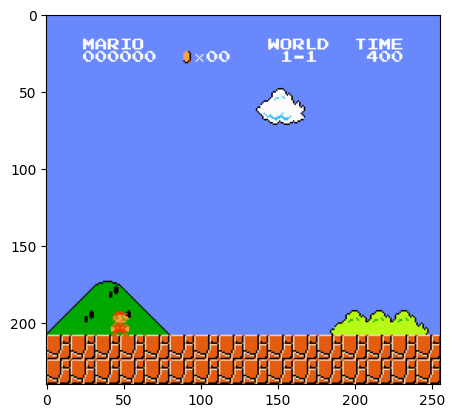

In [5]:
state = env.reset()
print(state.shape)
plt.imshow(state)

In [7]:
from gym.wrappers import GrayScaleObservation

In [10]:
del env
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,keep_dim=True)

(240, 256, 1)


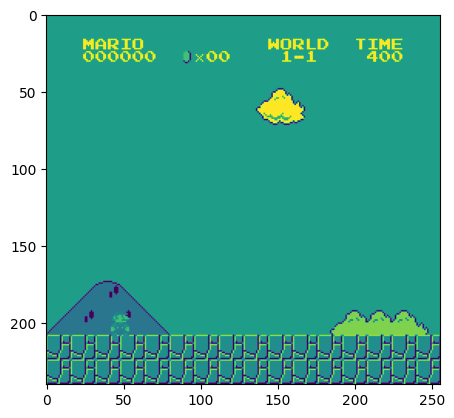

In [12]:
state = env.reset()
print(state.shape)
plt.imshow(state)

# 一、矢量化环境的作用

https://stable-baselines3.readthedocs.io/en/master/guide/examples.html

![](image/矢量化环境/1646580687830.png)



# DummyEnv

(1, 240, 256, 1)


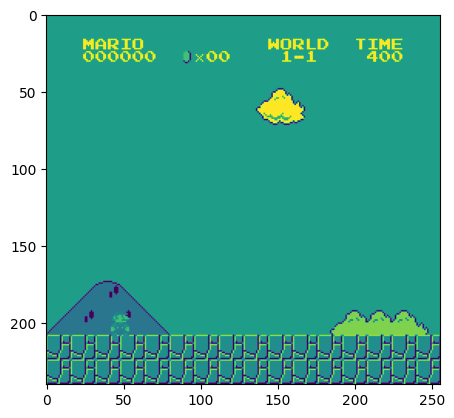

In [17]:
from stable_baselines3.common.vec_env import DummyVecEnv
env = DummyVecEnv([lambda: env])
state = env.reset()
print(state.shape)
plt.imshow(state[0])

# VectorFrameStack

In [18]:
from stable_baselines3.common.vec_env import VecFrameStack

In [24]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4,channels_order='last')


In [25]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)


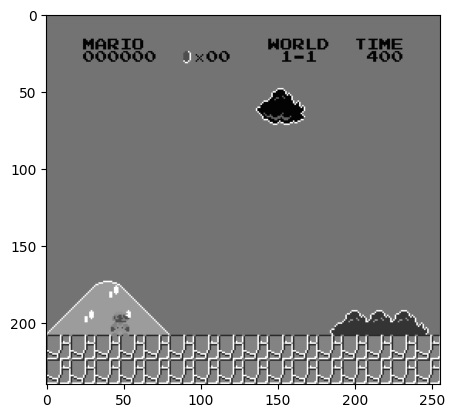

In [26]:
plt.imshow(state[0])

[[140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 ...
 [214 124 124 ... 124 124   0]
 [214 124 124 ... 124   0   0]
 [124   0   0 ...   0   0 124]]


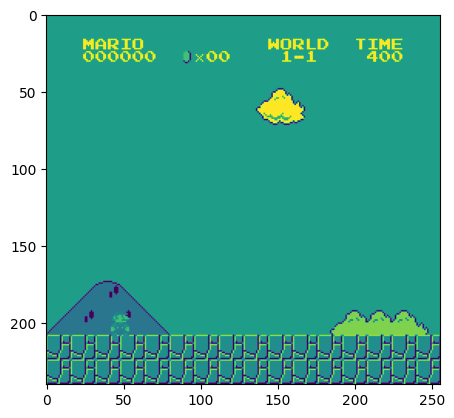

In [34]:
# 用切片得到每一张图片
# 只有最后一张是图片，其它都是0
plt.imshow(state[0][:,:,3])
print((state[0][:,:,3]))

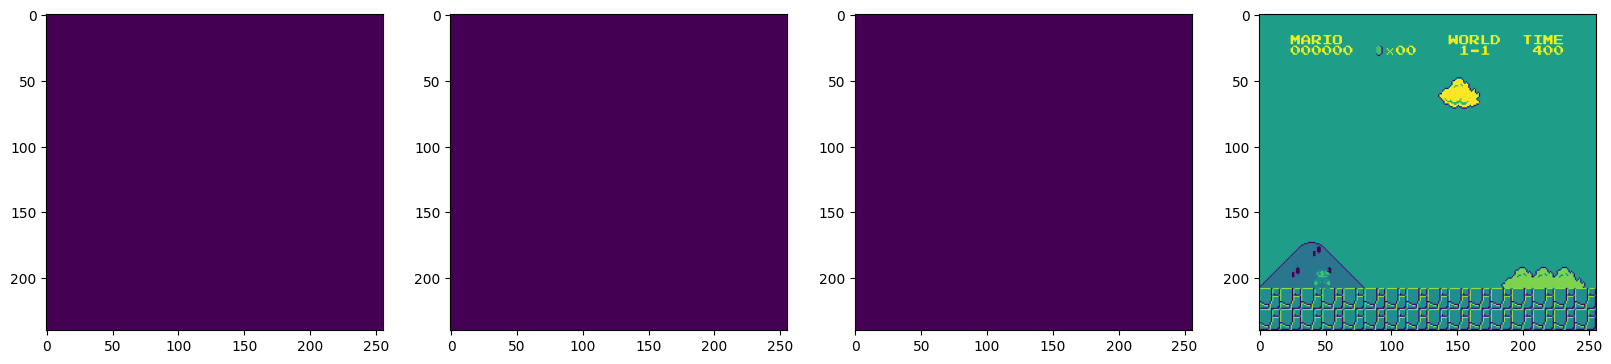

In [36]:
plt.figure(figsize=(20, 16))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [37]:
def show_img_4(state):
    plt.figure(figsize=(20, 16))
    for idx in range(state.shape[3]):
        plt.subplot(1, 4, idx + 1)
        plt.imshow(state[0][:,:,idx])
    plt.show()

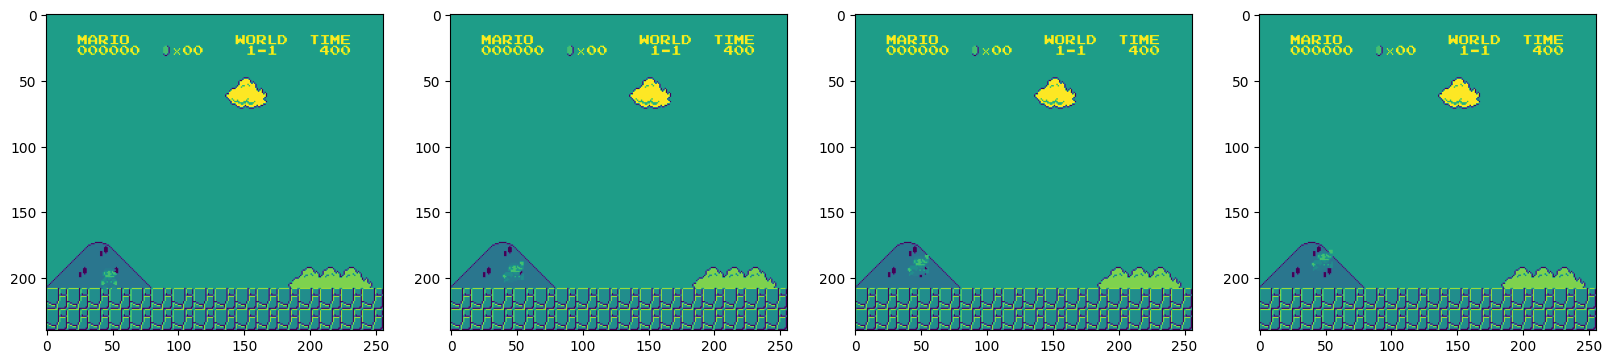

In [42]:
state, reward, done, info = env.step([env.action_space.sample()])
show_img_4(state)

# Monitor

In [44]:
from stable_baselines3.common.monitor import Monitor

In [49]:
import os
monitor_dir = r'./monitor_log/'
os.makedirs(monitor_dir,exist_ok=True)
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,keep_dim=True)
env = Monitor(env, monitor_dir)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4,channels_order='last')


In [50]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)
